# EDA

In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# !pip install num2words
from num2words import num2words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Importing dataset
df = pd.read_json('Resume.json', lines=True)
df.to_csv('dataframe.csv', index = None)
df.head()

,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


## Feature Engineering

In [3]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not", "aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [4]:
def clean_text(resume):
    resume = resume.lower()
    resume = expand_contractions(resume)
    resume = re.sub("\n", ' ', resume)
    resume = re.sub(r'[,•()➢❑]', ' ', resume)
    resume = re.sub(r'\s\s+|\s-\s|\.\s', ' ', resume)
    tokenized_words = resume.split(" ")
    sw = set(stopwords.words('english'))
    
    tokens_without_sw = []
    for w in tokenized_words:
        if w not in sw:
            tokens_without_sw.append(w)
    lm = WordNetLemmatizer() 
    tokens_without_sw = [lm.lemmatize(word) for word in tokens_without_sw if not word in set(sw)]
    final_resume = " ".join(tokens_without_sw)
    return final_resume

In [5]:
resume_content = df['content']

dict = {'content':[]}
clean_resumes = pd.DataFrame(dict)

for resume in resume_content:
    clean_resumes.loc[len(clean_resumes.index)] = clean_text(resume) 
    
clean_resumes

,content
0,govardhana k senior software engineer bengalur...
1,harini komaravelli test analyst oracle hyderab...
2,hartej kathuria data analyst intern oracle ret...
3,ijas nizamuddin associate consultant state str...
4,imgeeyaul ansari java developer pune maharasht...
...,...
195,mansi thanki student jamnagar gujarat email in...
196,anil kumar microsoft azure basic management de...
197,siddharth choudhary microsoft office suite exp...
198,valarmathi dhandapani investment banking opera...


In [6]:
clean_resumes['content'][5]

'jay madhavi navi mumbai maharashtra email indeed: indeed.com/r/jay- madhavi/1e7d0305af766bf6 look forward associated growth oriented learning firm contribute skill success allow grow professionally well individually  work experience niit  2016 2016 b+ average advanced sql oracle  2016 2016 b+ average mscit  2011 2011 completed technical institution project undertaken : s.n project title name company/college nature remark project 1 android based saraswati college android completed employee tracker engineering application system 2 innovative saraswati college compilation completed approach engineering code optimization 3 simple website saraswati college website related completed related engineering information classical italian car car myself: capable hardworking adapt new surroundings  https://www.indeed.com/r/jay-madhavi/1e7d0305af766bf6?isid=rex-download&ikw=download-top&co=in https://www.indeed.com/r/jay-madhavi/1e7d0305af766bf6?isid=rex-download&ikw=download-top&co=in face challeng

In [7]:
clean_resumes['content_len'] = clean_resumes['content'].apply(lambda x: len(x))

In [8]:
clean_resumes['word_count'] = clean_resumes['content'].apply(lambda x: len(x.split()))

In [9]:
def get_avg_word_len(x):
  words = x.split()
  word_len = 0
  for word in words:
    word_len += len(word)
  return word_len / len(words)

In [10]:
clean_resumes['avg_word_len'] = clean_resumes['content'].apply(lambda x: get_avg_word_len(x))

In [11]:
clean_resumes.head()

,content,content_len,word_count,avg_word_len
0,govardhana k senior software engineer bengalur...,1676,190,7.768421
1,harini komaravelli test analyst oracle hyderab...,4372,527,7.246679
2,hartej kathuria data analyst intern oracle ret...,2144,276,6.760870
3,ijas nizamuddin associate consultant state str...,3812,460,7.263043
4,imgeeyaul ansari java developer pune maharasht...,1826,243,6.456790


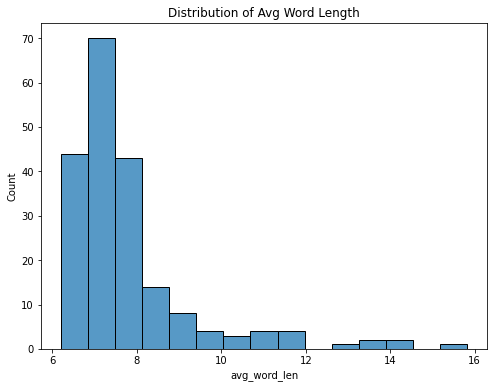

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(clean_resumes['avg_word_len'], bins=15);
plt.title('Distribution of Avg Word Length')
plt.show()

Most of the Resumes have average word length of 7

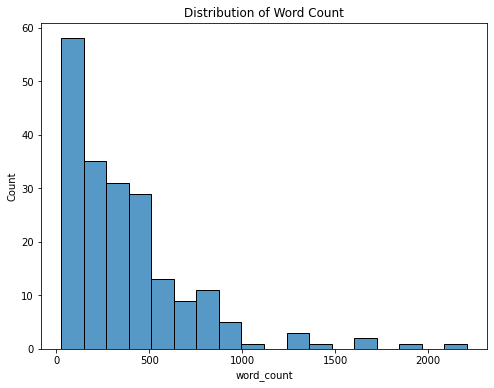

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(clean_resumes['word_count']);
plt.title('Distribution of Word Count')
plt.show()

Most of the Resumes are having less than 500 words

## Distribution of Unigram, Bigram & Trigram

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

### Unigram

In [15]:
def get_top_n_words(x, n):
  vec = CountVectorizer().fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [16]:
words = get_top_n_words(clean_resumes['content'], 50)

In [17]:
words

[('indeed', 678),
 ('year', 651),
 ('management', 629),
 ('project', 610),
 ('com', 570),
 ('download', 561),
 ('team', 542),
 ('experience', 523),
 ('application', 482),
 ('system', 452),
 ('skill', 441),
 ('testing', 422),
 ('work', 421),
 ('microsoft', 421),
 ('client', 402),
 ('test', 393),
 ('data', 385),
 ('service', 366),
 ('using', 366),
 ('in', 343),
 ('support', 321),
 ('https', 317),
 ('www', 317),
 ('co', 312),
 ('customer', 309),
 ('oracle', 303),
 ('tool', 300),
 ('business', 297),
 ('server', 296),
 ('technology', 291),
 ('process', 290),
 ('top', 289),
 ('technical', 289),
 ('isid', 277),
 ('rex', 277),
 ('ikw', 277),
 ('software', 276),
 ('report', 275),
 ('issue', 261),
 ('sap', 258),
 ('development', 256),
 ('engineer', 251),
 ('sql', 245),
 ('email', 235),
 ('information', 234),
 ('infosys', 231),
 ('knowledge', 227),
 ('worked', 223),
 ('requirement', 222),
 ('education', 221)]

In [18]:
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1

,Unigram,Frequency
0,indeed,678
1,year,651
2,management,629
3,project,610
4,com,570
5,download,561
6,team,542
7,experience,523
8,application,482
9,system,452


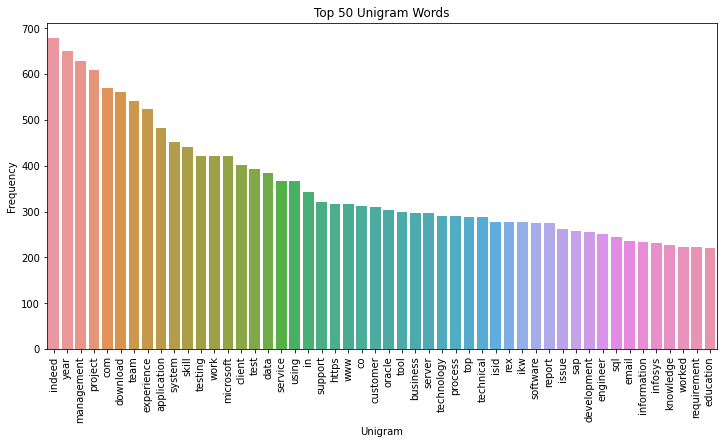

In [19]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df1, x = 'Unigram', y = 'Frequency');
g.set_xticklabels(df1['Unigram'], rotation=90)
plt.title('Top 50 Unigram Words')
plt.show()

### Bigram

In [20]:
def get_top_n_words(x, n):
  vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [21]:
words = get_top_n_words(clean_resumes['content'], 50)

In [22]:
words

[('indeed com', 477),
 ('https www', 301),
 ('www indeed', 277),
 ('isid rex', 277),
 ('rex download', 277),
 ('download ikw', 277),
 ('ikw download', 277),
 ('download top', 277),
 ('top co', 277),
 ('co in', 277),
 ('work experience', 212),
 ('email indeed', 200),
 ('indeed indeed', 200),
 ('le year', 192),
 ('additional information', 140),
 ('bengaluru karnataka', 107),
 ('willing relocate', 86),
 ('infosys limited', 86),
 ('tamil nadu', 83),
 ('in https', 80),
 ('test case', 78),
 ('year additional', 69),
 ('system engineer', 66),
 ('sql server', 65),
 ('engineer infosys', 60),
 ('hyderabad telangana', 57),
 ('pune maharashtra', 56),
 ('team member', 55),
 ('karnataka email', 53),
 ('year experience', 53),
 ('pvt ltd', 53),
 ('operating system', 52),
 ('relocate to', 48),
 ('software engineer', 47),
 ('asp net', 47),
 ('project management', 42),
 ('microsoft office', 42),
 ('computer science', 41),
 ('information technical', 40),
 ('problem solving', 39),
 ('2016 present', 38),
 ('

In [23]:
df2 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df2

,Bigram,Frequency
0,indeed com,477
1,https www,301
2,www indeed,277
3,isid rex,277
4,rex download,277
5,download ikw,277
6,ikw download,277
7,download top,277
8,top co,277
9,co in,277


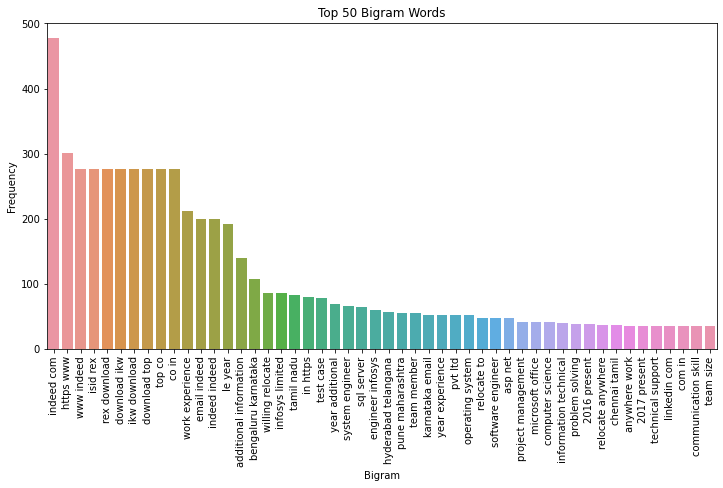

In [24]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df2, x = 'Bigram', y = 'Frequency');
g.set_xticklabels(df2['Bigram'], rotation=90)
plt.title('Top 50 Bigram Words')
plt.show()

### Trigram

In [25]:
def get_top_n_words(x, n):
  vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [26]:
words = get_top_n_words(clean_resumes['content'], 50)

In [27]:
words

[('https www indeed', 277),
 ('www indeed com', 277),
 ('isid rex download', 277),
 ('rex download ikw', 277),
 ('download ikw download', 277),
 ('ikw download top', 277),
 ('download top co', 277),
 ('top co in', 277),
 ('email indeed indeed', 200),
 ('indeed indeed com', 200),
 ('co in https', 80),
 ('in https www', 78),
 ('year additional information', 69),
 ('karnataka email indeed', 53),
 ('willing relocate to', 48),
 ('system engineer infosys', 44),
 ('engineer infosys limited', 41),
 ('additional information technical', 40),
 ('willing relocate anywhere', 37),
 ('chennai tamil nadu', 37),
 ('le year additional', 37),
 ('relocate anywhere work', 36),
 ('anywhere work experience', 36),
 ('linkedin com in', 35),
 ('bengaluru karnataka email', 34),
 ('www linkedin com', 33),
 ('senior system engineer', 29),
 ('india pvt ltd', 28),
 ('maharashtra email indeed', 27),
 ('additional information skill', 26),
 ('telangana email indeed', 25),
 ('operating system window', 23),
 ('https www 

In [28]:
df3 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df3

,Trigram,Frequency
0,https www indeed,277
1,www indeed com,277
2,isid rex download,277
3,rex download ikw,277
4,download ikw download,277
5,ikw download top,277
6,download top co,277
7,top co in,277
8,email indeed indeed,200
9,indeed indeed com,200


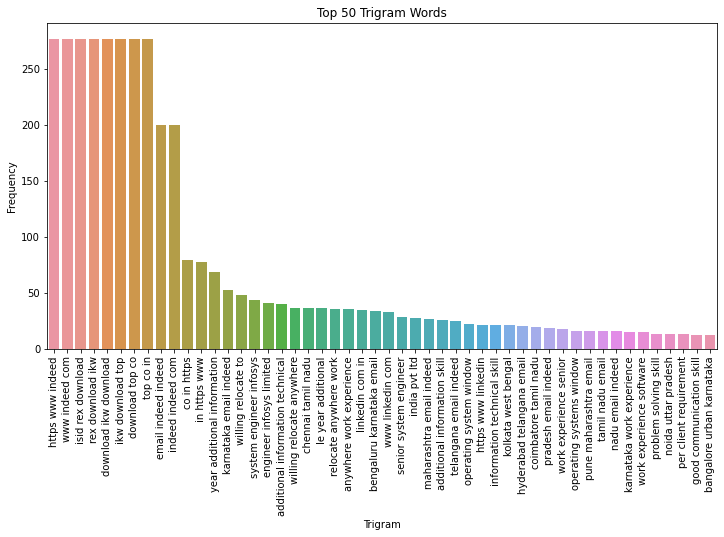

In [29]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df3, x = 'Trigram', y = 'Frequency');
g.set_xticklabels(df3['Trigram'], rotation=90)
plt.title('Top 50 Trigram Words')
plt.show()

## Distribution of Top 50 Part-of-Speech POS Tags

In [30]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [31]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [32]:
blob = TextBlob(str(clean_resumes['content']))
blob.tags

[('0', 'CD'),
 ('govardhana', 'NN'),
 ('k', 'NN'),
 ('senior', 'JJ'),
 ('software', 'NN'),
 ('engineer', 'NN'),
 ('bengalur', 'NN'),
 ('1', 'CD'),
 ('harini', 'NN'),
 ('komaravelli', 'JJ'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderab', 'NN'),
 ('2', 'CD'),
 ('hartej', 'NN'),
 ('kathuria', 'NNS'),
 ('data', 'NNS'),
 ('analyst', 'NN'),
 ('intern', 'JJ'),
 ('oracle', 'NN'),
 ('ret', 'NN'),
 ('3', 'CD'),
 ('ijas', 'JJ'),
 ('nizamuddin', 'JJ'),
 ('associate', 'NN'),
 ('consultant', 'NN'),
 ('state', 'NN'),
 ('str', 'NN'),
 ('4', 'CD'),
 ('imgeeyaul', 'NN'),
 ('ansari', 'NN'),
 ('java', 'NN'),
 ('developer', 'NN'),
 ('pune', 'NN'),
 ('maharasht', 'NN'),
 ('195', 'CD'),
 ('mansi', 'NN'),
 ('thanki', 'NN'),
 ('student', 'NN'),
 ('jamnagar', 'NN'),
 ('gujarat', 'NN'),
 ('email', 'NN'),
 ('in', 'IN'),
 ('196', 'CD'),
 ('anil', 'JJ'),
 ('kumar', 'NN'),
 ('microsoft', 'JJ'),
 ('azure', 'NN'),
 ('basic', 'JJ'),
 ('management', 'NN'),
 ('de', 'NN'),
 ('197', 'CD'),
 ('siddhart

In [33]:
pos_df = pd.DataFrame(blob.tags, columns = ['words', 'pos'])
pos_df.head()

,words,pos
0,0,CD
1,govardhana,NN
2,k,NN
3,senior,JJ
4,software,NN


In [34]:
pos_df = pos_df['pos'].value_counts()
pos_df

NN     51
JJ     12
CD     11
NNS     2
NNP     1
IN      1
Name: pos, dtype: int64

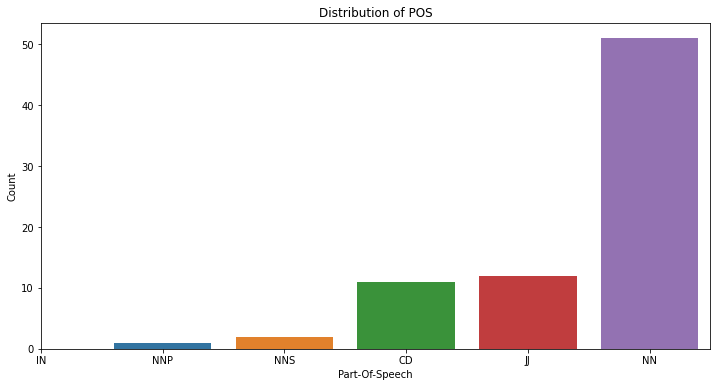

In [35]:
plt.figure(figsize = (12, 6))
sns.barplot(data = pos_df, y = pos_df.index, x = pos_df.values);
labels = list(pos_df.index)
labels.reverse()
plt.xticks(np.arange(6) - 1.0, labels)
plt.title('Distribution of POS')
plt.ylabel('Count')
plt.xlabel('Part-Of-Speech')
plt.show();

## Word Cloud

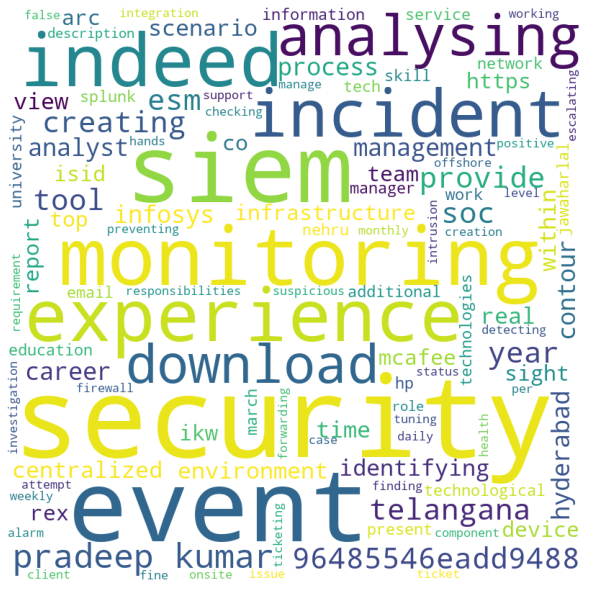

In [36]:
#Final word cloud after all the cleaning and pre-processing
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
content_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in clean_resumes.content: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    content_words = content_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(content_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

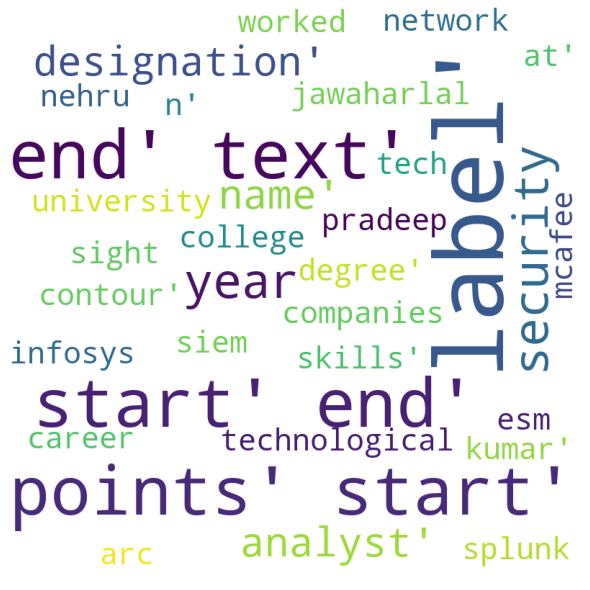

In [37]:
#Final word cloud after all the cleaning and pre-processing
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
content_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.annotation: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    content_words = content_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(content_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()